<a href="https://colab.research.google.com/github/RoshiEttehadi/AI-CNN-SKINCANCER/blob/main/Copy_of_cnn_AI_skinCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install tensorflow
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/gdrive')

# Load dataset
benign_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-benign'
malignant_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-malignant'


import os

# Function to count the number of images in a folder
def count_images(folder):
    return len([filename for filename in os.listdir(folder) if filename.endswith(".jpg") or filename.endswith(".png")])

# Count the number of images in each class
num_benign_images = count_images(benign_folder)
num_malignant_images = count_images(malignant_folder)

print(f"Number of benign images: {num_benign_images}")
print(f"Number of malignant images: {num_malignant_images}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load images and label them
def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            # Load the image and resize it
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize image to [0, 1]
            images.append(image)
            labels.append(label)
    return images, labels

# Load malignant and benign images
def load_data():
    benign_images, benign_labels = load_images(benign_folder, 0)
    malignant_images, malignant_labels = load_images(malignant_folder, 1)

    # Combine the benign and malignant images and labels
    images = benign_images + malignant_images
    labels = benign_labels + malignant_labels

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Split the dataset into training and validation sets (80-20 split)
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

    return X_train, X_val, y_train, y_val



Mounted at /content/gdrive


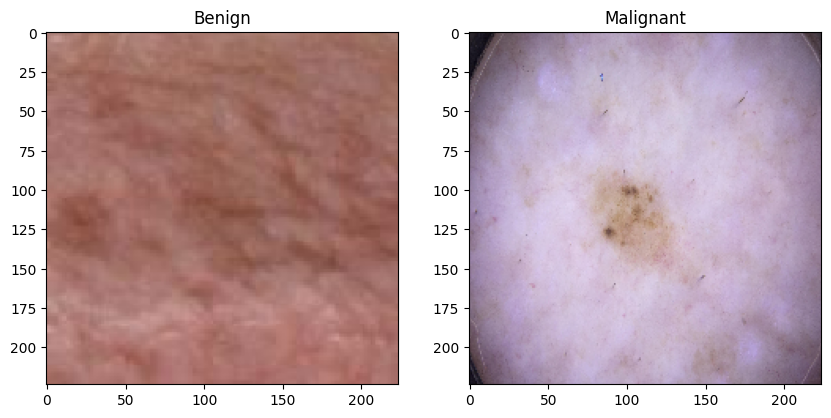

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1103s 25s/step - accuracy: 0.5446 - loss: 0.7018 - val_accuracy: 0.7604 - val_loss: 0.5429 - learning_rate: 1.0000e-04
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 140ms/step - accuracy: 0.6667 - loss: 0.5879 - val_accuracy: 0.7273 - val_loss: 0.5471 - learning_rate: 1.0000e-04
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1072s 25s/step - accuracy: 0.7480 - loss: 0.5606 - val_accuracy: 0.7812 - val_loss: 0.4967 - learning_rate: 1.0000e-04
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 28s 194ms/step - accuracy: 0.5938 - loss: 0.6597 - val_accuracy: 0.4545 - val_loss: 0.7754 - learning_rate: 1.0000e-04
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1070s 25s/step - accuracy: 0.7507 - loss: 0.5344 - val_accuracy: 0.7986 - val_loss: 0.4990 - learning_rate: 1.0000e-04
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7500 - loss: 0.5262 - val_accuracy: 0.5455 - val_loss: 0.6566 - learning_rate: 1.0000e-04
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1065s 25s/step - accura

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       138
           1       0.81      0.88      0.85       162

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



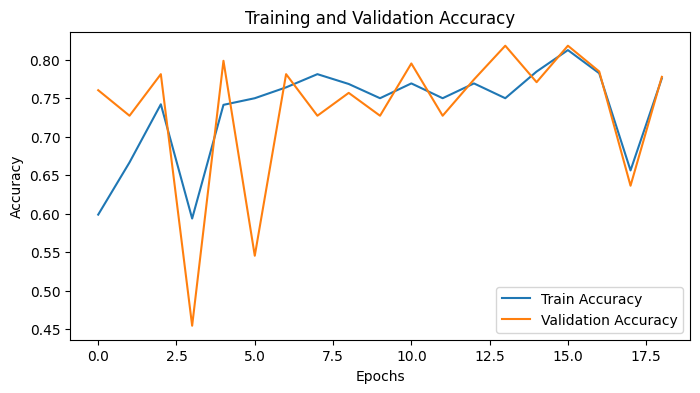

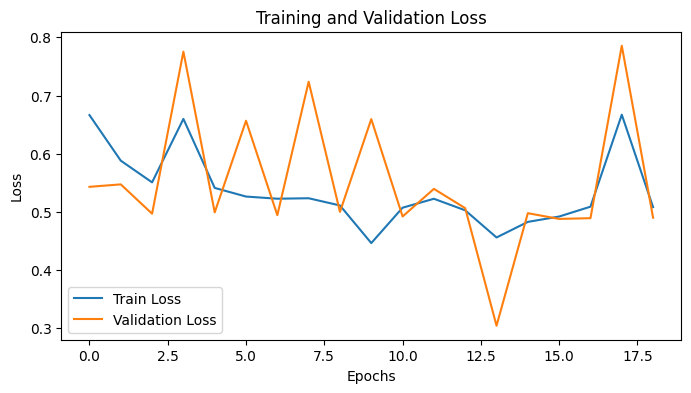

In [ ]:
## CNN Model with VGG - Roshi

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Import required libraries
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load dataset folders
benign_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-benign'
malignant_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-malignant'

# Load images and label them
def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(image_dir, filename)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize image
            images.append(image)
            labels.append(label)
    return images, labels

# Load malignant and benign images
def load_data():
    benign_images, benign_labels = load_images(benign_folder, 0)
    malignant_images, malignant_labels = load_images(malignant_folder, 1)

    images = benign_images + malignant_images
    labels = benign_labels + malignant_labels

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Split into training (70%), validation (15%), and test (15%) sets
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, shuffle=True)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

# Visualize one instance of each class present in the dataset
def visualize_data(X_train, y_train):
    plt.figure(figsize=(10, 5))

    # Visualize one benign image
    benign_idx = np.where(y_train == 0)[0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[benign_idx])
    plt.title("Benign")

    # Visualize one malignant image
    malignant_idx = np.where(y_train == 1)[0][0]
    plt.subplot(1, 2, 2)
    plt.imshow(X_train[malignant_idx])
    plt.title("Malignant")

    plt.show()

visualize_data(X_train, y_train)

# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a validation data generator (without augmentation)
val_datagen = ImageDataGenerator()

# Use flow for validation data as well
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Build the CNN model with VGG16 transfer learning
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Freeze the base model layers

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Adjust steps_per_epoch and validation_steps
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_steps = len(X_val) // batch_size

# Train the model with learning rate reduction on plateau
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

# Evaluate the model on the test data and calculate performance metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Predict on the test data to get precision, recall and F1-score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Save the model
model.save('/content/gdrive/MyDrive/models/skin_cancer_detection_model.h5')

# Plot training history (accuracy and loss)
# Accuracy plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Mounted at /content/gdrive
Loading dataset...
Loading benign images...
Loading malignant images...

Dataset Statistics:
Total images: 1996
Benign images: 988
Malignant images: 1008
Class distribution: [ 988 1008]

Visualizing sample images...


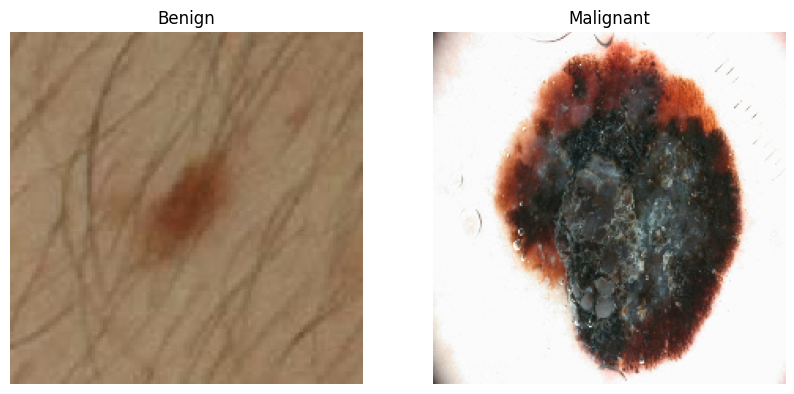


Creating model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gaussian_noise_1 (GaussianNoise)     │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,789,441 (56.42 MB)

 Trainable params: 7,153,793 (27.29 MB)

 Non-trainable params: 7,635,648 (29.13 MB)


Training model...

Epoch 1: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1254s 29s/step - accuracy: 0.4875 - auc_1: 0.4896 - loss: 1.2206 - val_accuracy: 0.4931 - val_auc_1: 0.4021 - val_loss: 1.0215 - learning_rate: 1.0000e-06

Epoch 2: LearningRateScheduler setting learning rate to 3.4e-05.
Epoch 2/30
 1/43 ━━━━━━━━━━━━━━━━━━━━ 16:35 24s/step - accuracy: 0.5312 - auc_1: 0.4686 - loss: 1.2994

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.5312 - auc_1: 0.4686 - loss: 1.2994 - val_accuracy: 0.5455 - val_auc_1: 0.5000 - val_loss: 0.9864 - learning_rate: 3.4000e-05

Epoch 3: LearningRateScheduler setting learning rate to 6.7e-05.
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1244s 29s/step - accuracy: 0.6079 - auc_1: 0.6441 - loss: 1.0643 - val_accuracy: 0.5139 - val_auc_1: 0.6961 - val_loss: 1.2003 - learning_rate: 6.7000e-05

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.7500 - auc_1: 0.7262 - loss: 0.9030 - val_accuracy: 0.2727 - val_auc_1: 1.0000 - val_loss: 1.6075 - learning_rate: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 9.966191788709716e-05.
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 1256s 29s/step - accuracy: 0.6182 - auc_1: 0.6620 - loss: 1.0000 - val_accuracy: 0.5035 - val_auc_1: 0.5000 - val_loss: 10.7750 - learning_rate: 9.9662e-05

Epoch 6: LearningRateSched

In [ ]:
## CNN Model with VGG - V2 - Roshi
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Define paths
benign_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-benign'
malignant_folder = '/content/gdrive/MyDrive/datasets/ISIC-images-malignant'

def load_images(image_dir, label):
    """Load and preprocess images from directory"""
    images = []
    labels = []
    try:
        for filename in os.listdir(image_dir):
            if filename.endswith((".jpg", ".png")):
                image_path = os.path.join(image_dir, filename)
                try:
                    image = tf.keras.preprocessing.image.load_img(
                        image_path,
                        target_size=(224, 224)
                    )
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    images.append(image)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {filename}: {str(e)}")
    except Exception as e:
        print(f"Error accessing directory {image_dir}: {str(e)}")
    return images, labels

def load_data():
    """Load and split the dataset"""
    print("Loading benign images...")
    benign_images, benign_labels = load_images(benign_folder, 0)
    print("Loading malignant images...")
    malignant_images, malignant_labels = load_images(malignant_folder, 1)

    if not benign_images or not malignant_images:
        raise ValueError("No images loaded from one or both classes")

    images = benign_images + malignant_images
    labels = benign_labels + malignant_labels

    # Convert to numpy arrays and normalize
    images = np.array(images) / 255.0
    labels = np.array(labels)

    # Print dataset statistics
    print(f"\nDataset Statistics:")
    print(f"Total images: {len(images)}")
    print(f"Benign images: {len(benign_images)}")
    print(f"Malignant images: {len(malignant_images)}")
    print(f"Class distribution: {np.bincount(labels)}")

    # Stratified split
    X_train, X_temp, y_train, y_temp = train_test_split(
        images, labels, test_size=0.3, random_state=42, stratify=labels
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

def visualize_data(X_train, y_train):
    """Visualize sample images from dataset"""
    plt.figure(figsize=(10, 5))

    # Show benign sample
    benign_idx = np.where(y_train == 0)[0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[benign_idx])
    plt.title("Benign")
    plt.axis('off')

    # Show malignant sample
    malignant_idx = np.where(y_train == 1)[0][0]
    plt.subplot(1, 2, 2)
    plt.imshow(X_train[malignant_idx])
    plt.title("Malignant")
    plt.axis('off')

    plt.show()

def create_model():
    """Create and compile the model"""
    # Load pre-trained VGG16
    base_model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=(224, 224, 3),
        weights='imagenet'
    )

    # Freeze early layers
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    # Build model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
        tf.keras.layers.GaussianNoise(0.05),
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),

        tf.keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )

    return model

def create_callbacks(total_epochs):
    """Create training callbacks"""
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        min_delta=0.005
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Learning rate schedule with warmup
    warmup_epochs = 3
    def lr_schedule(epoch):
        if epoch < warmup_epochs:
            return 1e-6 + (1e-4 - 1e-6) * epoch / warmup_epochs
        else:
            # Cosine decay after warmup
            decay_epochs = total_epochs - warmup_epochs
            epoch_after_warmup = epoch - warmup_epochs
            cosine = 0.5 * (1 + np.cos(np.pi * epoch_after_warmup / decay_epochs))
            return 1e-4 * cosine

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

    return [early_stopping, reduce_lr, lr_scheduler]

def plot_training_history(history):
    """Plot training metrics"""
    plt.figure(figsize=(15, 5))

    # Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # AUC
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main execution
try:
    # Load and preprocess data
    print("Loading dataset...")
    X_train, X_val, X_test, y_train, y_val, y_test = load_data()

    # Visualize samples
    print("\nVisualizing sample images...")
    visualize_data(X_train, y_train)

    # Create data generators
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input
    )

    val_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input
    )

    # Create validation generator
    val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

    # Create and compile model
    print("\nCreating model...")
    model = create_model()
    model.summary()

    # Calculate class weights
    total = len(y_train)
    neg = np.sum(y_train == 0)
    pos = np.sum(y_train == 1)
    class_weights = {0: total/(2.0 * neg), 1: total/(2.0 * pos)}

    # Training parameters
    batch_size = 32
    epochs = 30
    steps_per_epoch = len(X_train) // batch_size
    validation_steps = len(X_val) // batch_size

    # Train model
    print("\nTraining model...")
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=val_generator,
        epochs=epochs,
        callbacks=create_callbacks(epochs),
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        class_weight=class_weights,
        verbose=1
    )

    # Evaluate model
    print("\nEvaluating model...")
    test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test AUC: {test_auc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Generate classification report
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot training history
    plot_training_history(history)

    # Save model
    print("\nSaving model...")
    model.save('/content/gdrive/MyDrive/models/skin_cancer_detection_model_final.h5')
    print("Training completed successfully!")

except Exception as e:
    print(f"An error occurred: {str(e)}")